In [ ]:
import numpy as np
import pandas as pd

In [ ]:
"""
Load and Label the data
feature extraction
Data normalization/standization
training - testing split
model training
model evalutaion
"""

'\nLoad and Label the data\nfeature extraction\nData normalization/standization\ntraining - testing split\nmodel training\nmodel evalutaion\n'

In [ ]:
"""
Load the label
"""
path = '/content/drive/MyDrive/Multimedia_Systems/Lab-2/dataset/ff1010bird_wav/'
fileName = 'ff1010bird_metadata.csv'
dfLabel = pd.read_csv(path+fileName)
dfLabel = dfLabel.values
dfLabel

array([[ 64486,      0],
       [  2525,      0],
       [ 44981,      0],
       ...,
       [ 80789,      1],
       [104733,      1],
       [ 40565,      0]])

In [ ]:
sortedDfLabels = dfLabel[dfLabel[:,0].argsort()]
sortedDfLabels

array([[    55,      0],
       [    87,      0],
       [    99,      0],
       ...,
       [195598,      0],
       [195739,      0],
       [195862,      0]])

In [ ]:
"""
Load data
"""
path  = '/content/drive/MyDrive/Multimedia_Systems/Lab-2/dataset/ff1010bird_wav/wav/'
import os
folderContents= os.listdir(path)
import natsort as ns
sortedFiles = ns.natsorted(folderContents)

In [ ]:
audioData = []
import librosa
for i in range(len(sortedFiles)):
  path2Audio = path + sortedFiles[i]
  audio,sr = librosa.load(path2Audio)
  fourSecSample= audio[2*sr:6*sr] #take 4 second from each sample
 #print(sortedFiles[i], sr, len(audio)/sr)
  audioData.append(fourSecSample)

In [ ]:
audioData = np.asarray(audioData)
print(type(audioData),np.shape(audio))

<class 'numpy.ndarray'> (220500,)


In [ ]:
def Feature_Extraction(samples):
  allFeature=[]
  for frame in range(len(samples)):
    # print(frame)
    OneSample=samples[frame,:]
    ###MFCC
    feature_mfcc=librosa.feature.mfcc(y=OneSample, sr=sr,n_mfcc=13,  hop_length=len(OneSample)+1)  
    ### energy
    feature_eng=np.sum(np.square(OneSample)).reshape(-1,1)
    ####ZCR
    feature_zcr=librosa.feature.zero_crossing_rate(OneSample,hop_length=len(OneSample)+1)  

    featuresOneFrame=np.concatenate((feature_mfcc,feature_eng,feature_zcr),axis = 0)  
    allFeature.append(featuresOneFrame)
  return allFeature

In [ ]:
features = Feature_Extraction(audioData)
features = np.asarray(features)

In [ ]:
features = np.reshape(features,(features.shape[0],features.shape[1]))
features.shape

(3818, 15)

In [ ]:
### standarize the data
print('before**************')
print(np.mean(features,axis=0))
print('\n')
print(np.std(features,axis=0))

before**************
[-2.04373007e+02  1.11694192e+02 -1.18233573e+01  2.36194500e+01
 -4.16288796e+00  1.18403027e+01 -3.69531453e+00  7.53980885e+00
 -3.99861176e+00  7.23131670e+00 -4.22276979e+00  6.13642338e+00
 -4.07320072e+00  9.08668001e+02  5.68185190e-02]


[1.20155635e+02 5.54628535e+01 3.24781684e+01 2.15639597e+01
 1.84206462e+01 1.52518673e+01 1.34070194e+01 1.19222909e+01
 1.11469107e+01 9.83071675e+00 9.58733725e+00 9.06951690e+00
 8.56429053e+00 1.11426512e+03 5.43836659e-02]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(features))
scaledData = scaler.transform(features)

print(np.mean(scaledData))
print(np.std(scaledData))

StandardScaler()
-1.985102806384076e-17
1.0


In [ ]:
### standarize the data
print('after**************')
print(np.mean(scaledData,axis=0))
print(np.std(scaledData,axis=0))

after**************
[-5.63544322e-17 -2.18380694e-17 -5.74594211e-17 -3.58539809e-17
 -2.12419570e-17 -1.33129349e-16 -1.30853945e-16  1.88429680e-17
 -2.92167780e-17 -6.79568153e-17 -1.52881025e-17 -4.01658001e-17
  4.22803635e-17 -1.22043112e-16  4.14080039e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#SVM Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaledData,dfLabel[0:3818,1],test_size = 0.3, random_state = 101,shuffle=True)

In [ ]:
scaledData.shape

(3818, 15)

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='rbf',C=10)
model.fit(X_train,y_train)



SVC(C=10)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#prediction on test data
predictions = model.predict(X_test)
print(predictions)
len(predictions)

[0 0 0 ... 0 0 0]


1146

In [ ]:
#different evaluation matrices
print('accuracy_score==',accuracy_score(y_test,predictions))
print('confusion matrix==\n',confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

accuracy_score== 0.7399650959860384
confusion matrix==
 [[824  60]
 [238  24]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       884
           1       0.29      0.09      0.14       262

    accuracy                           0.74      1146
   macro avg       0.53      0.51      0.49      1146
weighted avg       0.66      0.74      0.68      1146



In [ ]:
print(X_train[0])

[-1.0785766   0.56923206  0.09426571  1.5657113   0.46300806  1.23665502
 -0.57387608 -1.27504694 -0.36611349  0.37663119  0.2194758  -0.65457796
 -1.66032891  0.0695338  -0.69461206]


In [ ]:
list(X_train).append(list(X_test))  
data = pd.DataFrame(X_test)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.132503,0.103004,0.803532,-0.361675,0.434062,0.646107,0.544666,1.297357,1.155451,0.453084,0.660607,-0.194328,0.299956,-0.295733,-0.703591
1,-0.604528,-0.111408,-1.763420,-1.952423,-0.901364,-1.467905,-2.022262,-0.373561,-0.022302,-0.575081,0.004207,1.433978,-0.083809,-0.679507,0.391781
2,0.508359,1.330120,-0.150716,0.087950,0.515222,0.179694,0.148907,1.352620,0.439667,-0.342843,-1.253714,-0.471018,-0.833517,0.733007,-0.712569
3,-0.552438,0.200514,0.655190,-0.032589,0.654257,0.371572,1.394834,1.434328,0.845670,0.901469,-0.463682,-0.544581,-1.118416,-0.570718,-0.631763
4,-0.179309,0.422058,-0.599056,-0.500497,-1.062970,-0.962369,-0.210156,0.294163,-0.837933,0.096546,0.383512,-0.397449,-0.940270,-0.050535,-0.335474


In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} ##for rbf kernel
# param_grid = {'C': [0.1,1, 10, 100, 1000], 'kernel': ['sigmoid']} ##for sigmoid kernel
# param_grid = {'C': [0.1,1, 10, 100, 1000], 'kernel': ['linear']} ##for linear kernel
# param_grid = {'C': [0.1,1, 10, 100, 1000], 'degree': [2,3,4,5,6], 'kernel': ['poly']} ##for polynomial kernel

### gamma=Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
### c=Regularization parameter

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

print(grid.best_params_)
grid.best_estimator_


grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(accuracy_score(y_test,grid_predictions))


## train SVM models with different kernel
model_linear = SVC(kernel='linear', C=1).fit(X_train, y_train)
model_rbf = SVC(kernel='rbf', gamma=1, C=1).fit(X_train, y_train)
model_poly = SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
model_sig = SVC(kernel='sigmoid', C=1).fit(X_train, y_train)


#prediction by each model on test data
linear_pred = model_linear.predict(X_test)
poly_pred = model_poly.predict(X_test)
rbf_pred = model_rbf.predict(X_test)
sig_pred = model_sig.predict(X_test)

# retrieve the accuracy and print it for all 4 kernel functions
accuracy_linear = model_linear.score(X_test, y_test)
accuracy_poly = model_poly.score(X_test, y_test)
accuracy_rbf = model_rbf.score(X_test, y_test)
accuracy_sig = model_sig.score(X_test, y_test)
print('Accuracy Linear Kernel:', accuracy_linear)
print('Accuracy Polynomial Kernel:', accuracy_poly)
print('Accuracy Radial Basis Kernel:', accuracy_rbf)
print('Accuracy Sigmoid Kernel:', accuracy_sig)
      
# creating a confusion matrix
cm_lin = confusion_matrix(y_test, linear_pred)
cm_poly = confusion_matrix(y_test, poly_pred)
cm_rbf = confusion_matrix(y_test, rbf_pred)
cm_sig = confusion_matrix(y_test, sig_pred)
print('cm_lin', '\n',cm_lin, '\n')
print('cm_poly', '\n',cm_poly ,'\n')
print('cm_rbf','\n',cm_rbf ,'\n')
print('cm_sig','\n',cm_sig ,'\n')


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ......................C=0.1, gamma=0.0

#KNN Model

[0 0 0 ... 0 0 0]
[0 0 1 ... 0 0 0]
(3818, 15)
Confusion Matrix:
 [[883   1]
 [262   0]]
Accuracy Score:
 0.7705061082024433
Classification Report
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       884
           1       0.00      0.00      0.00       262

    accuracy                           0.77      1146
   macro avg       0.39      0.50      0.44      1146
weighted avg       0.59      0.77      0.67      1146



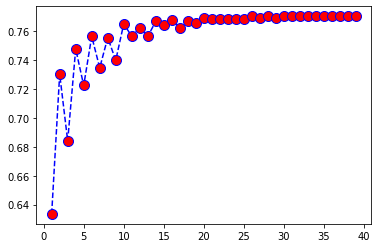

In [ ]:
# Data standerization
from sklearn import preprocessing
feature_standardized = preprocessing.scale(features)

#Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaledData,dfLabel[0:3818,1],test_size = 0.3, random_state = 101,shuffle=True)

#learn KNN classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

classifier = KNeighborsClassifier(n_neighbors = 30)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(y_pred)
print(y_test)
print(features.shape)

import matplotlib.pyplot as plt

#Look for optimal value of k
acc = [];
for i in range(1,40):
   neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
   yhat = neigh.predict(X_test)
   acc.append(accuracy_score(y_test, yhat))

plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("Confusion Matrix:\n",cm);
print("Accuracy Score:\n", ac);
print("Classification Report\n",cr);


#K-means Model

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

classifier = KMeans(n_clusters=2)
classifier.fit(X_train)

y_pred = classifier.predict(X_test)

print(y_pred)
print(features.shape)


[1 0 1 ... 0 1 0]
(3818, 15)


In [ ]:
from sklearn.metrics import silhouette_score
classifier = KMeans(n_clusters=2) 
classifier.fit_predict(X_train)
score = silhouette_score(X_train, classifier.labels_,metric="euclidean")
#print(score)

new_score=[]
new_cluster=[]
for i in range(2,20):
  classifier = KMeans(n_clusters=i) 
  classifier.fit_predict(X_train)
  score = silhouette_score(X_train, classifier.labels_,metric="euclidean")
  new_score.append(score) 
  new_cluster.append(i)

print("No of Cluster\n", new_cluster , "\n")
print("Silhouette score for each cluster")
for j in range(len(new_score)):
  print(new_score[j])





No of Cluster
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] 

Silhouette score for each cluster
0.1332707084416603
0.12959974533661003
0.07007997990386845
0.06631935537490749
0.06674428715409671
0.06611176279966233
0.07067466642855087
0.0615748076753839
0.06509467161409357
0.0634990003121702
0.058748687690952185
0.061110377890168266
0.05564821542740249
0.055544897371564275
0.05166775087783462
0.05115401509713078
0.05144660921254002
0.054895852363639
